# Assignment 3
sajjad pakdaman savoji <br>
810195517

# Problem 4 

In [37]:
from hw3 import *

In [2]:
train = Data_set()
train.load('pendigits.tra')
train.fit()

In [3]:
test = Data_set()
test.load('pendigits.tes')

In [4]:
pred = train.classify_all(test.features)

In [5]:
acc(test.labels , pred)

0.9588336192109777

In [6]:
conf_mat = confusion_mat(test.labels , pred)
conf_mat

array([[342,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 350,   8,   9,   2,   0,   0,  28,   0,   5],
       [  0,  12, 355,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 320,   0,   1,   0,   0,   0,   0],
       [  0,   1,   0,   0, 360,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0, 323,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 325,   0,   0,   0],
       [  0,   0,   1,   1,   0,   0,   0, 314,   0,   1],
       [ 21,   1,   0,   0,   0,   2,  11,   5, 336,   1],
       [  0,   0,   0,   5,   2,   9,   0,  17,   0, 329]])

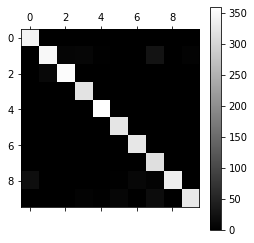

In [7]:
plot_confusion_mat(conf_mat)

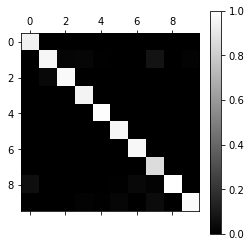

In [8]:
plot_confusion_mat(normalize_conf_mat(conf_mat))

# Problem 5 

In [8]:
train = Data_set()
train.load('pendigits.tra')
train.fit()

In [9]:
test = Data_set()
test.load('pendigits.val')

In [4]:
train.init_risk(risk_matrix(0.8 , 0., train.c))
pred = train.classify_all_risk(test.features)
pred

array([ 8.,  8.,  8.,  9.,  9.,  1.,  4.,  7.,  9.,  9.,  9.,  0.,  2.,
        0.,  5.,  9.,  3.,  1.,  0.,  4.,  6.,  8.,  7.,  6.,  6.,  0.,
        4.,  0.,  4.,  1.,  9.,  3.,  5.,  4.,  4.,  1.,  1.,  0.,  9.,
        7.,  8.,  9.,  5.,  6.,  0.,  8.,  2.,  8.,  7.,  8.,  1.,  9.,
        5.,  4.,  1.,  2.,  1.,  6.,  0.,  8.,  0.,  8.,  6.,  2.,  9.,
        9.,  8.,  0.,  3.,  3.,  8.,  3., 10.,  1.,  3.,  9.,  5.,  8.,
        0.,  8.,  0.,  0.,  9.,  1.,  5.,  1.,  2.,  0.,  8.,  0.,  9.,
        7.,  3.,  8.,  2.,  9.,  0.,  8.,  4.])

In [31]:
l =0 
h =1 
s = 0.1
res0 = exhastive_search(train , test , result = True , step =s , low= l , high = h)


In [32]:
x = np.arange(l, h, s)
y = np.arange(l, h, s)
X , Y = np.meshgrid(x , y)

z = []
for i in res0.keys():
    z.append(res0[i])
z = np.array(z)
Z = z.reshape(X.shape)

Text(0.5, 0, 'precision')

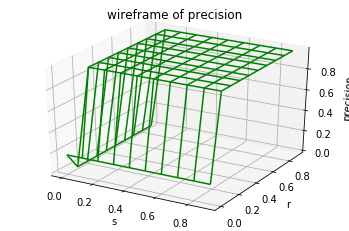

In [33]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_title('wireframe of precision')
ax.set_xlabel('s')
ax.set_ylabel('r')
ax.set_zlabel('precision')

Text(0.5, 0, 'precision')

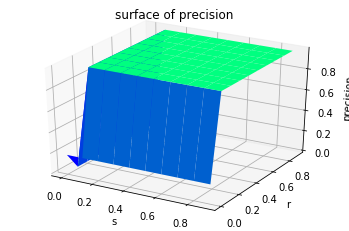

In [34]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('surface of precision')
ax.set_xlabel('s')
ax.set_ylabel('r')
ax.set_zlabel('precision')

In [29]:
key = max(res0.items(), key=operator.itemgetter(1))[0]
key

(0.2, 0.2)

In [30]:
res0[key]

0.9797979797979798

## confusion matrix

In [10]:
train.init_risk(risk_matrix(0.2 , 0.2, train.c))
pred = train.classify_all_risk(test.features)

In [11]:
conf_mat = confusion_mat(test.labels , pred)
conf_mat

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 15]])

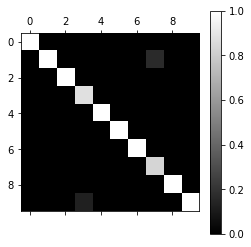

In [12]:
plot_confusion_mat(normalize_conf_mat(conf_mat))

# problem 6 

## part 1

In [2]:
train = Data_set()
train.load('pendigits.tra')

In [3]:
test = Data_set()
test.load('pendigits.val')

In [27]:
res = exhastive_search_for_h(train , test  , low = 9, high = 11 , step = 0.25 , result = "yes" , win = Gaussian_window)

Text(0, 0.5, 'acc')

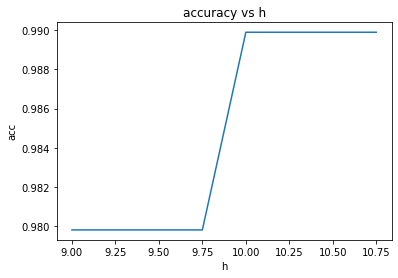

In [28]:
plt.plot(list(res.keys()) , list(res.values()))
plt.title('accuracy vs h')
plt.xlabel('h')
plt.ylabel('acc')

In [13]:
rect_win = Rect_window(24, 16)
guassian_win = Gaussian_window(10 , 16)

dist_rect = parzen_estimate(rect_win)
dist_guassian = parzen_estimate(guassian_win)

In [14]:
train = Data_set()
train.load('pendigits.tra')
train.fit(distribution=dist_rect)

In [15]:
test = Data_set()
test.load('pendigits.val')

In [16]:
pred = train.classify_all(test.features)

In [17]:
acc(test.labels , pred)

0.9494949494949495

In [18]:
conf_mat = confusion_mat(test.labels , pred)
conf_mat

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 15]])

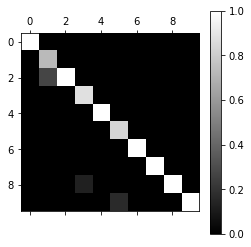

In [19]:
plot_confusion_mat(normalize_conf_mat(conf_mat))

In [21]:
train.fit(distribution=dist_guassian)

In [22]:
pred = train.classify_all(test.features)
acc(test.labels , pred)

0.98989898989899

In [23]:
conf_mat = confusion_mat(test.labels , pred)
conf_mat

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 15]])

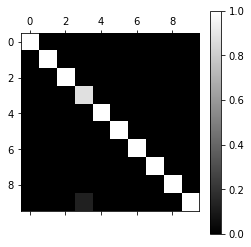

In [24]:
plot_confusion_mat(normalize_conf_mat(conf_mat))

## part2 

In [25]:
train = Data_set()
train.load('pendigits.tra')

In [28]:
test = Data_set()
test.load('pendigits.tes')

In [4]:
res = exhastive_search_for_k(train , test , result='yes')

Text(0, 0.5, 'acc')

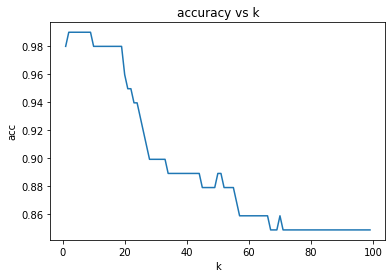

In [5]:
plt.plot(list(res.keys()) , list(res.values()))
plt.title('accuracy vs k')
plt.xlabel('k')
plt.ylabel('acc')

In [6]:
key = max(res.items(), key=operator.itemgetter(1))[0]
key

2

In [7]:
res[key]

0.98989898989899

## confusion matrix

In [31]:
dist = knn_estimate(k = 2)
train.fit(distribution=dist)
pred = train.classify_all(test.features)
acc(test.labels , pred)

0.9765580331618068

In [32]:
conf_mat = confusion_mat(test.labels , pred)
conf_mat

array([[354,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 347,   2,   1,   0,   0,   0,  15,   0,   2],
       [  0,  15, 362,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 333,   0,   5,   0,   0,   0,   7],
       [  0,   1,   0,   0, 353,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  10, 329,   0,   0,   1,   1],
       [  6,   0,   0,   0,   1,   0, 336,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0, 347,   0,   4],
       [  2,   0,   0,   0,   0,   0,   0,   1, 334,   1],
       [  1,   0,   0,   2,   0,   1,   0,   0,   0, 321]])

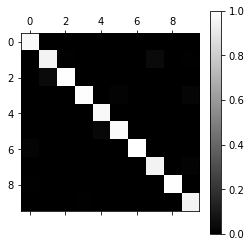

In [33]:
plot_confusion_mat(normalize_conf_mat(conf_mat))

## part 3 

In [29]:
train = Data_set()
train.load('pendigits.tra')

In [30]:
test = Data_set()
test.load('pendigits.tes')

In [4]:
knn = knn_classifier( k = 1)
knn.fit(train.features , train.labels)
pred = knn.transform(test.features)
acc(pred , test.labels)

0.9774156660949114

In [5]:
knn = knn_classifier(k = 3)
knn.fit(train.features , train.labels)
pred = knn.transform(test.features)
acc(pred , test.labels)

0.9779874213836478

In [6]:
knn = knn_classifier(k = 5)
knn.fit(train.features , train.labels)
pred = knn.transform(test.features)
acc(pred , test.labels)

0.9759862778730704

In [7]:
knn = knn_classifier(k = 10)
knn.fit(train.features , train.labels)
pred = knn.transform(test.features)
acc(pred , test.labels)

0.9748427672955975

## confusion matix

In [34]:
knn = knn_classifier(k = 3)
knn.fit(train.features , train.labels)
pred = knn.transform(test.features)
acc(pred , test.labels)

0.9779874213836478

In [35]:
conf_mat = confusion_mat(test.labels , pred)
conf_mat

array([[354,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 350,   2,   1,   0,   0,   0,  10,   0,   3],
       [  0,  11, 362,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 333,   0,   5,   0,   0,   0,   7],
       [  0,   1,   0,   0, 354,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,  10, 328,   0,   0,   1,   1],
       [  5,   0,   0,   0,   0,   0, 336,   1,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0, 351,   0,   4],
       [  3,   0,   0,   0,   0,   0,   0,   1, 334,   1],
       [  1,   0,   0,   2,   0,   2,   0,   0,   0, 319]])

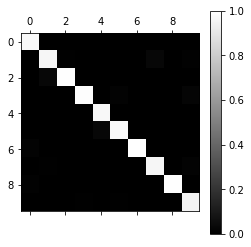

In [36]:

plot_confusion_mat(normalize_conf_mat(conf_mat))

# problem 7

## part 2 --> timing